In [1]:
import time
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np 
from tensorflow import keras
from sklearn import metrics
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from keras.layers import LSTM, Dense, Flatten, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
downstairs = pd.read_csv("DOWNSTAIRS.csv")
fall = pd.read_csv("FALL.csv")
jog = pd.read_csv("JOG.csv")
sit = pd.read_csv("SIT.csv")
upstairs = pd.read_csv("UPSTAIRS.csv")
walk = pd.read_csv("WALK.csv")

dataframe = pd.concat([downstairs, fall, jog, sit, upstairs, walk], ignore_index = True)

In [3]:
#KNN

In [4]:
Label = { 'walking':0, 'upstairs':1, 'downstairs':2 , 'sitting':3, 'jogging':4 , 'fall':5} 
dataframe = dataframe[["accx", "accy", "accz", "gyrx","gyry","gyrz",  "Label"]]
dataframe.Label = [Label[item] for item in dataframe.Label]

In [5]:
X = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 31)

In [7]:
def f1vsK(K): 
    plt.figure(figsize=(10,8)) 
    mean_error = [] 
    std_error = []
    for i in K:
        model=KNeighborsClassifier(n_neighbors=i,weights='uniform').fit(xtrain, ytrain) 
        scores = cross_val_score(model,X,y,cv=5) 
        mean_error.append(np.array(scores).mean()) 
        std_error.append(np.array(scores).std())
    plt.errorbar(K, mean_error, yerr=std_error, color ="darkblue") 
    plt.xlabel('K')
    plt.ylabel('F1 score')
    plt.title("F1 score vs K")

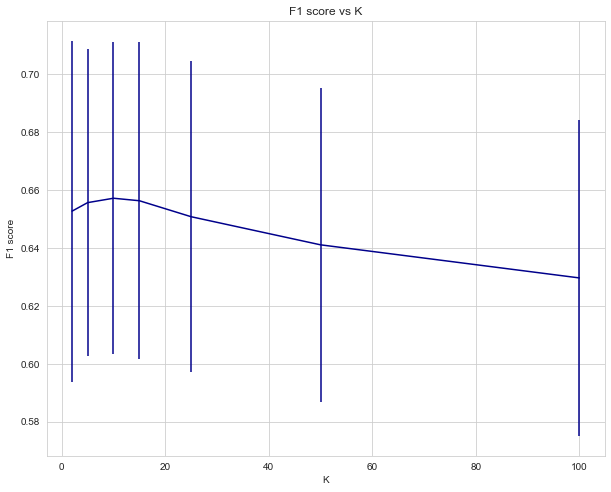

In [8]:
f1vsK([2,5,10,15,25,50,100])

In [9]:
#k=10

In [10]:
model=KNeighborsClassifier(n_neighbors=10,weights='uniform')
model.fit(xtrain, ytrain)
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)
accuracy_score(ytest, y_test_pred)

0.7420608108108108

In [11]:
confusion_matrix(ytest,y_test_pred)

array([[3045,  273,  179,   25,   37,   42],
       [ 598, 1694,  216,   26,   18,   28],
       [ 502,  526,  816,   20,   61,   28],
       [  29,    9,    9, 1690,    5,    0],
       [ 119,   80,   95,    2, 1034,   22],
       [  19,   34,   28,    0,   24,  507]])

In [12]:
confusionmatrix = confusion_matrix(ytest,y_test_pred)

In [13]:
confusionmatrix = pd.DataFrame(confusionmatrix)

<AxesSubplot:>

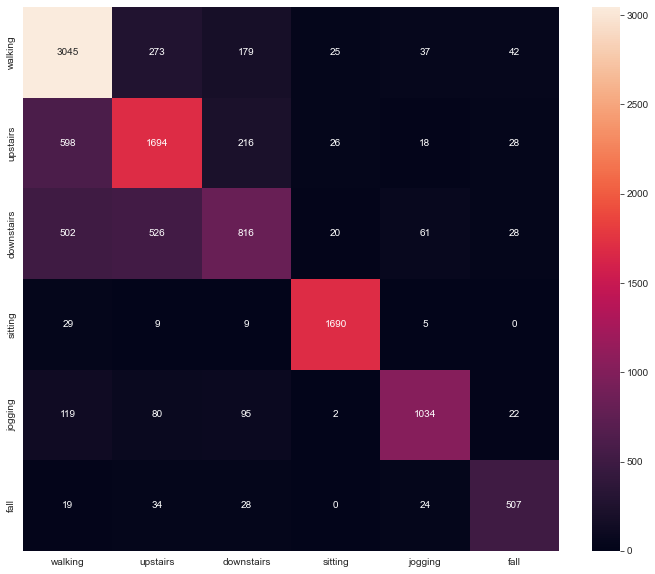

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(confusionmatrix,xticklabels = Label, yticklabels = Label, fmt='d',annot = True)

In [15]:
probas = model.predict_proba(xtest)

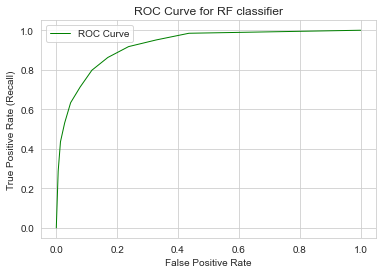

In [16]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, probas[:,0], pos_label=0)
#plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(["ROC Curve"])
plt.show()

In [17]:
#Random Forest

<AxesSubplot:xlabel='Label', ylabel='count'>

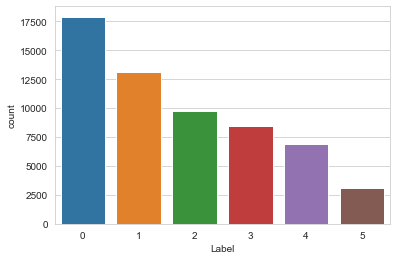

In [18]:
import seaborn as sb
sb.countplot(x = 'Label', data = dataframe)

In [19]:
X = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state =31)

In [21]:
def f1vsnum_trees(num_trees):
    plt.figure(figsize=(10,8)) 
    mean_error = [] 
    std_error = []
    for n in num_trees:
        model = RandomForestClassifier(n_estimators=n,max_depth=4,class_weight='balanced').fit(xtrain, ytrain)
        scores = cross_val_score(model,X,y,cv=4) 
        mean_error.append(np.array(scores).mean()) 
        std_error.append(np.array(scores).std())
    plt.errorbar(num_trees, mean_error, yerr=std_error) 
    plt.xlabel('Number of Estimators')
    plt.ylabel('F1 score')
    plt.title("F1 score vs Number of Estimators")
    plt.legend(["F1 score"])

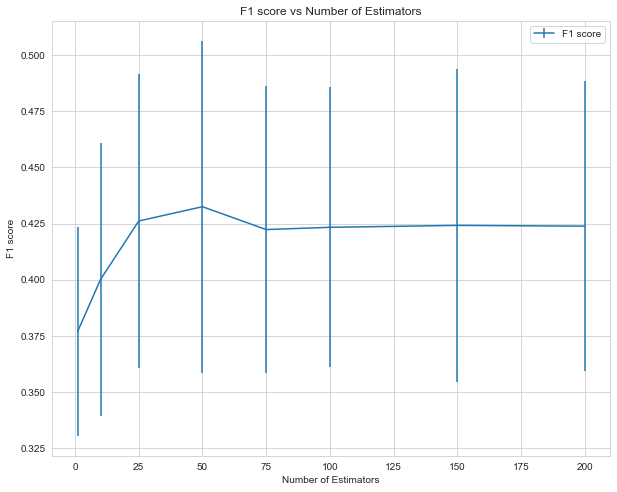

In [22]:
f1vsnum_trees([1,10,25,50,75,100,150,200])

In [24]:
num_trees = 150

model = RandomForestClassifier(n_estimators=num_trees,max_depth=4,class_weight='balanced')
model.fit(xtrain, ytrain)
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)
accuracy_score(ytest, y_test_pred)

0.5771959459459459

In [25]:
confusion_matrix(ytest,y_test_pred)

array([[1894,  684,  757,   59,  104,  103],
       [ 517, 1273,  404,   98,  134,  154],
       [ 414,  594,  560,   78,  183,  124],
       [   2,   11,   91, 1611,   27,    0],
       [ 106,   75,  129,   10,  941,   91],
       [   5,   12,   13,    3,   24,  555]])

In [26]:
confusionmatrix = confusion_matrix(ytest,y_test_pred)

In [27]:
confusionmatrix = pd.DataFrame(confusionmatrix)

<AxesSubplot:>

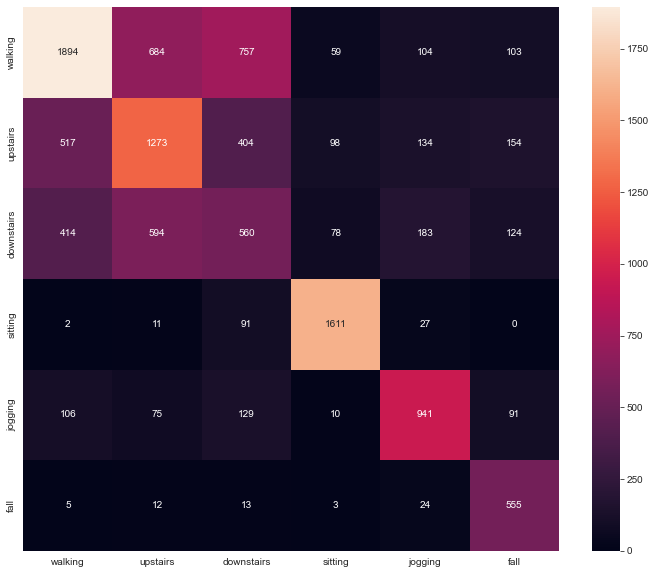

In [28]:
plt.figure(figsize=(12,10))
sb.heatmap(confusionmatrix,xticklabels = Label, yticklabels = Label, fmt='d',annot = True)

In [29]:
probas = model.predict_proba(xtest)

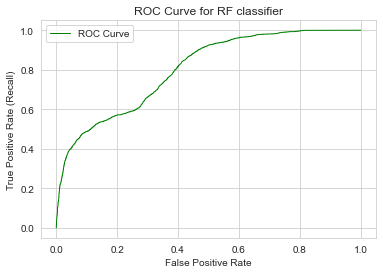

In [30]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, probas[:,0], pos_label=0)
#plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(["ROC Curve"])
plt.show()

In [31]:
#LSTM

In [32]:
STEP_SIZE = 20
SENSOR_COUNT = 6
NUM_LABELS = 6
RANDOM_SEED = 42 
EPOCHS = 100
BATCH_SIZE = 1024    

Total Length of Dataset: 59196


<AxesSubplot:>

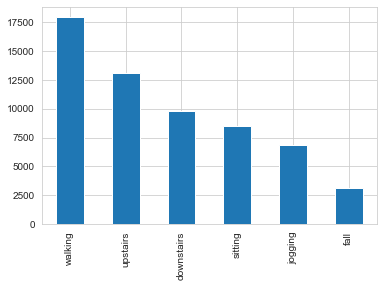

In [33]:
downstairs = pd.read_csv("DOWNSTAIRS.csv")
fall = pd.read_csv("FALL.csv")
jog = pd.read_csv("JOG.csv")
sit = pd.read_csv("SIT.csv")
upstairs = pd.read_csv("UPSTAIRS.csv")
walk = pd.read_csv("WALK.csv")

dataframe = pd.concat([downstairs, fall, jog, sit, upstairs, walk], ignore_index = True)

print("Total Length of Dataset: {}".format(len(dataframe)))
Labels = dataframe['Label'].unique()
dataframe['Label'].value_counts().plot(kind='bar')

In [34]:
def plot_timeseries(label):
    activity_data = dataframe[dataframe['Label'] == label][:500]
    
    plt.figure(figsize=(10,10))
    sns.lineplot(y = 'accx', x = 'UpdatedTime', data = activity_data)
    sns.lineplot(y = 'accy', x = 'UpdatedTime', data = activity_data)
    sns.lineplot(y = 'accz', x = 'UpdatedTime', data = activity_data)
    plt.legend(["x-axis", "y-axis", "z-axis"])
    plt.xlabel("Timestamp")
    plt.title("Accelerometer Plot for {}".format(label), fontsize = 15)
    plt.show()

    plt.figure(figsize=(10,10))
    sns.lineplot(y = 'gyrx', x = 'UpdatedTime', data = activity_data)
    sns.lineplot(y = 'gyry', x = 'UpdatedTime', data = activity_data)
    sns.lineplot(y = 'gyrz', x = 'UpdatedTime', data = activity_data)
    plt.legend(["x-axis", "y-axis", "z-axis"])
    plt.xlabel("Timestamp")
    plt.title("Gyroscope Plot for {}".format(label), fontsize = 15)
    plt.show()

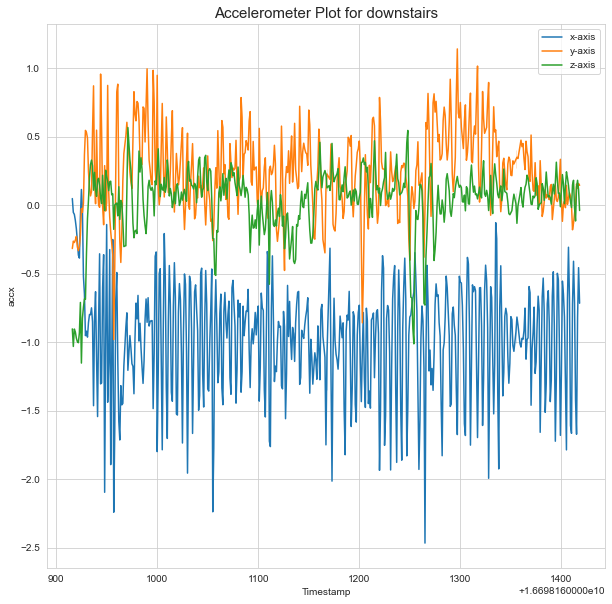

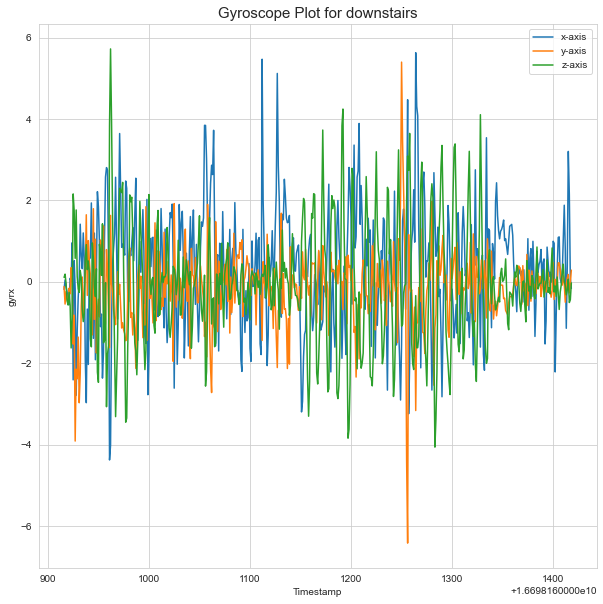

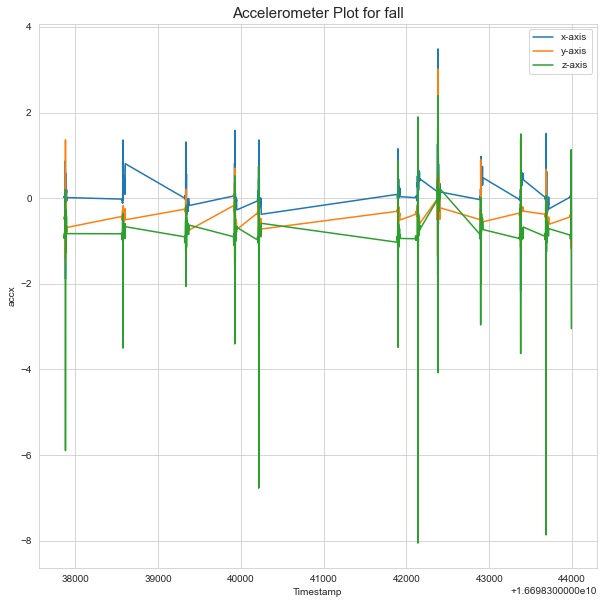

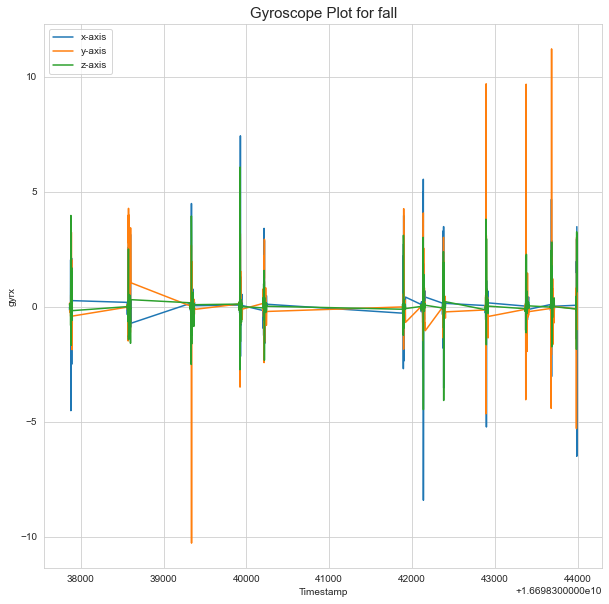

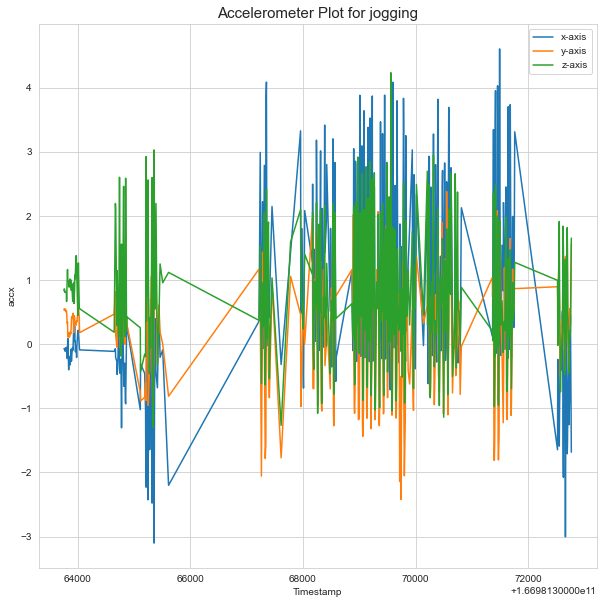

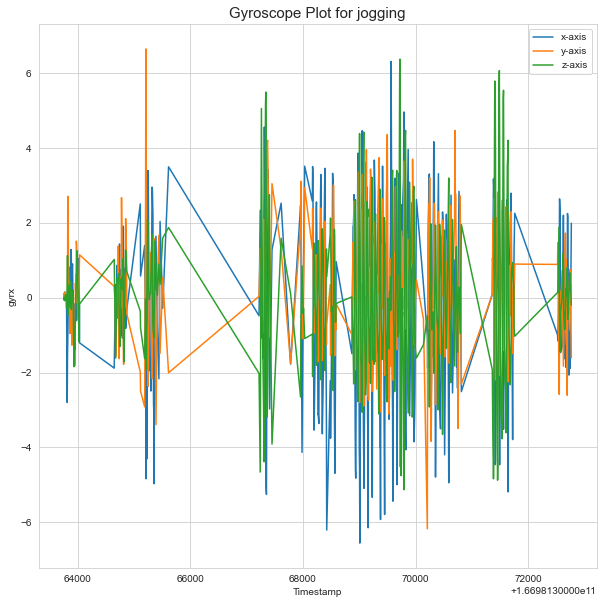

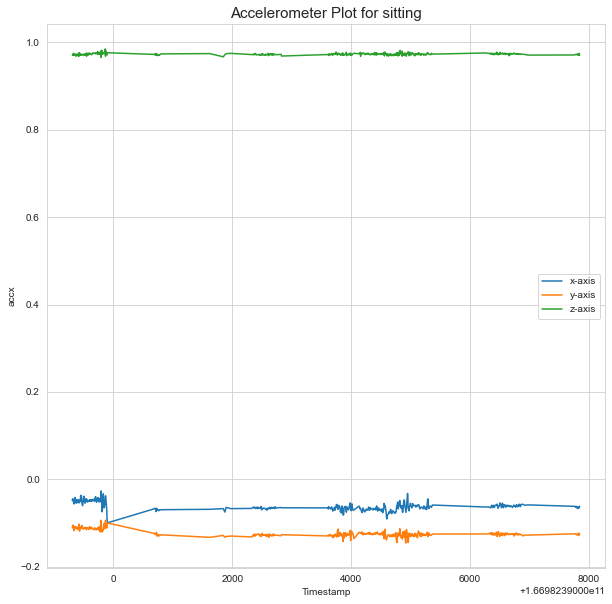

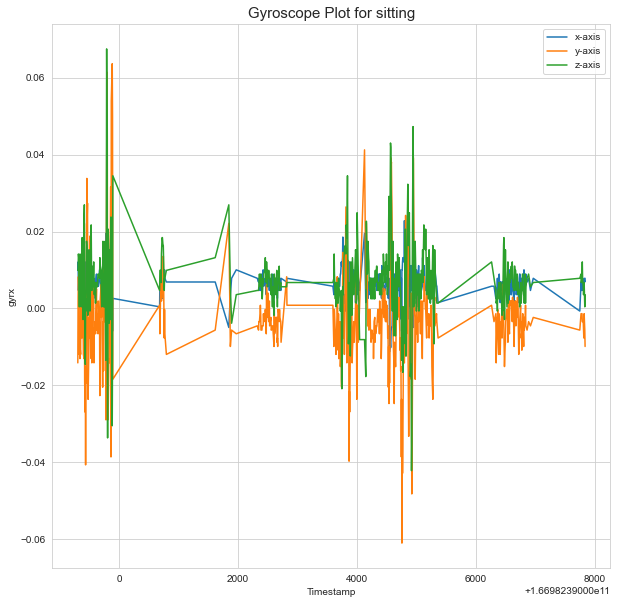

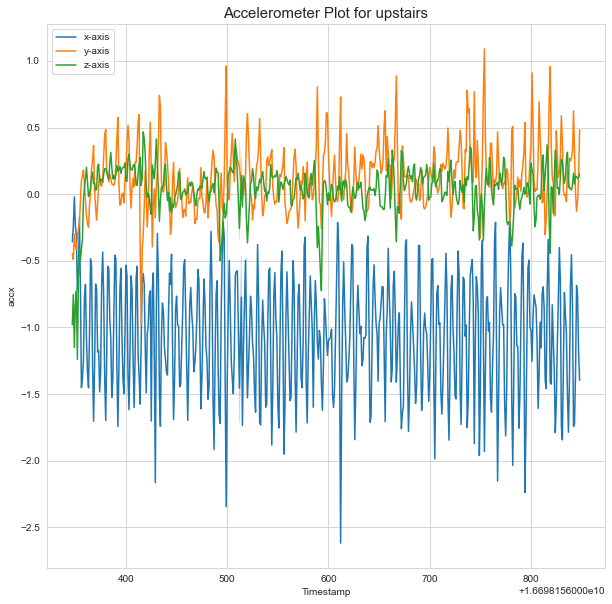

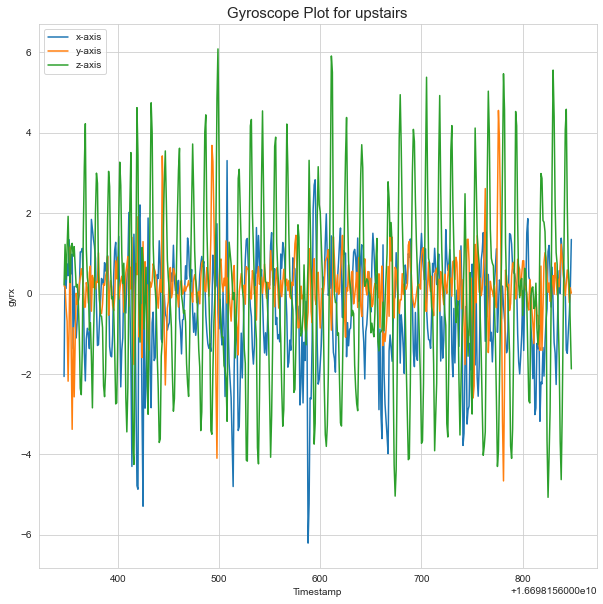

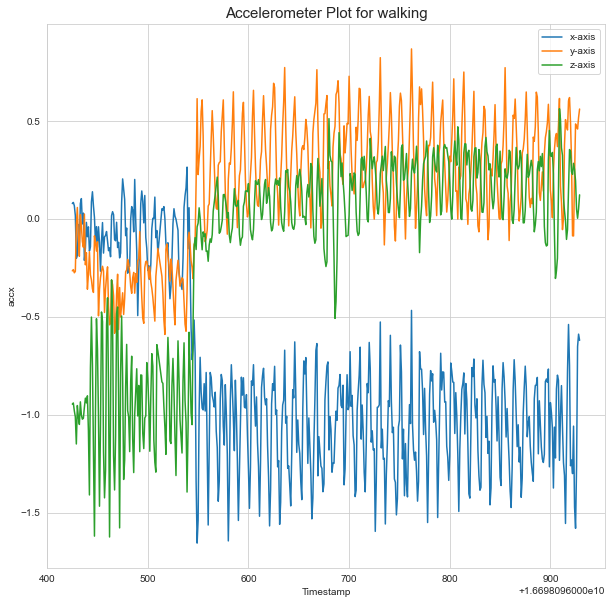

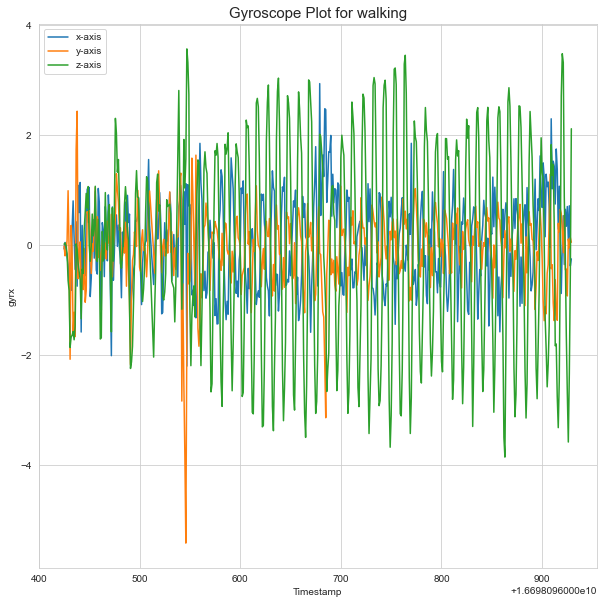

In [35]:
for label in Labels:
  plot_timeseries(label)

In [36]:
segments = []
labels = []

for i in range(dataframe.shape[0]-STEP_SIZE):  

    accx = dataframe['accx'].values[i: i + STEP_SIZE]
    accy = dataframe['accy'].values[i: i + STEP_SIZE]
    accz = dataframe['accz'].values[i: i + STEP_SIZE]

    gyrx = dataframe['gyrx'].values[i: i + STEP_SIZE]
    gyry = dataframe['gyrx'].values[i: i + STEP_SIZE]
    gyrz = dataframe['gyrx'].values[i: i + STEP_SIZE]

    label = stats.mode(dataframe['Label'][i: i + STEP_SIZE])[0][0]

    segments.append([accx, accy, accz, gyrx, gyry, gyrz])

    labels.append(label)

In [37]:
reshaped_segments = np.asarray(segments).reshape(-1, STEP_SIZE, NUM_LABELS)
print(reshaped_segments.shape)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
print(labels.shape)

(59176, 20, 6)
(59176, 6)


In [38]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "No GPU available!"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

AssertionError: No GPU available!

In [39]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = RANDOM_SEED)

with tf.device('/device:GPU:0'):
  lstm = Sequential()
  lstm.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
  lstm.add(Dropout(0.5)) 
  lstm.add(Dense(units = 64, activation='relu'))
  lstm.add(Dense(y_train.shape[1], activation = 'softmax'))
  lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(lstm.summary())

  start = time.time()
  history = lstm.fit(X_train, y_train, epochs = EPOCHS, validation_split = 0.20, batch_size = BATCH_SIZE, verbose = 1)
  end = time.time()

  loss, accuracy = lstm.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose = 1)
  print("Training Time: {}".format((end-start)/60))
  print("Test Accuracy: {}".format(accuracy))
  print("Test Loss: {}".format(loss))



2022-12-02 21:34:52.057402: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 21:34:52.266189: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               69120     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 77,766
Trainable params: 77,766
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
37/37 [==============================] - 6s 147ms/step - loss: 1.6666 - accuracy: 0.2989 - val_loss: 1.1890 - val_accuracy: 0.5058
Epoch 2/100
37/37 [==============================] - 5s 136ms/step - loss: 1.1280 - accuracy: 0.5461 -

Epoch 52/100
37/37 [==============================] - 6s 168ms/step - loss: 0.2353 - accuracy: 0.9110 - val_loss: 0.2191 - val_accuracy: 0.9163
Epoch 53/100
37/37 [==============================] - 6s 168ms/step - loss: 0.2216 - accuracy: 0.9162 - val_loss: 0.2173 - val_accuracy: 0.9181
Epoch 54/100
37/37 [==============================] - 6s 168ms/step - loss: 0.2192 - accuracy: 0.9170 - val_loss: 0.2285 - val_accuracy: 0.9143
Epoch 55/100
37/37 [==============================] - 6s 175ms/step - loss: 0.2256 - accuracy: 0.9147 - val_loss: 0.2218 - val_accuracy: 0.9169
Epoch 56/100
37/37 [==============================] - 6s 172ms/step - loss: 0.2197 - accuracy: 0.9164 - val_loss: 0.2128 - val_accuracy: 0.9188
Epoch 57/100
37/37 [==============================] - 6s 170ms/step - loss: 0.2257 - accuracy: 0.9171 - val_loss: 0.2146 - val_accuracy: 0.9217
Epoch 58/100
37/37 [==============================] - 6s 170ms/step - loss: 0.2127 - accuracy: 0.9199 - val_loss: 0.2059 - val_accuracy:

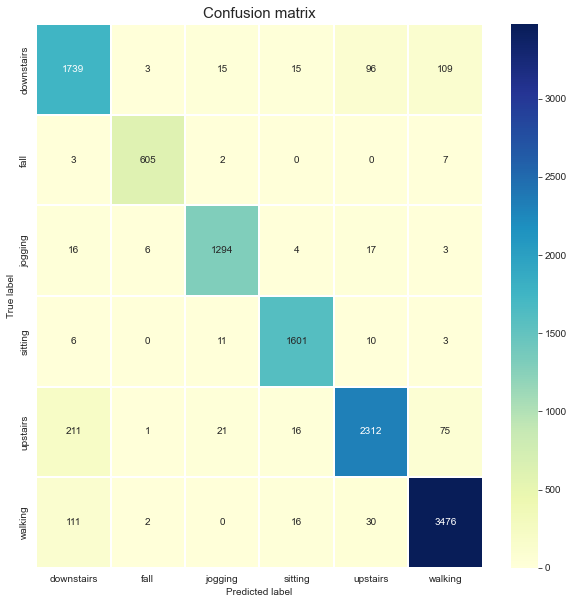

In [40]:
plt.figure(figsize=(10,10))
predictions = lstm.predict(X_test)
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix_res = confusion_matrix(max_test.tolist(), max_predictions.tolist())
sns.heatmap(confusion_matrix_res, xticklabels = Labels, yticklabels = Labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
#Baseline

In [42]:
dataframe

,accx,accy,accz,UpdatedTime,gyrx,gyry,gyrz,Label
0,0.048035,-0.316528,-0.903107,16698160916,-0.185081,-0.116196,0.110085,downstairs
1,-0.053101,-0.262848,-1.031204,16698160917,0.045830,-0.546108,0.189391,downstairs
2,-0.067001,-0.272980,-0.904190,16698160918,-0.123644,-0.234115,-0.048207,downstairs
3,-0.110901,-0.255554,-0.925537,16698160919,-0.253013,-0.437749,-0.468041,downstairs
4,-0.172440,-0.228378,-0.970474,16698160920,-0.458798,-0.522205,-0.569147,downstairs
...,...,...,...,...,...,...,...,...
59191,-0.132354,0.538211,0.549622,16698133732,0.306212,0.289438,0.214500,walking
59192,-0.171618,0.423187,0.971586,16698133733,-0.014438,0.347050,0.072738,walking
59193,-0.231685,0.479567,0.768152,16698133734,-0.022962,0.287375,0.053625,walking
59194,-0.303972,0.449389,0.882151,16698133735,-0.494862,0.089237,-0.010312,walking


In [43]:
X = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state =31)

0.3041385135135135


Text(0.5, 1.0, 'Confusion matrix')

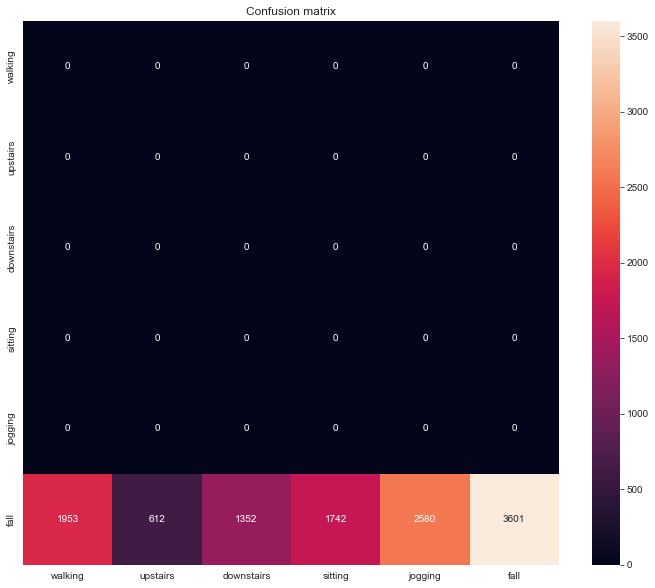

In [45]:
dummy = DummyClassifier(strategy="most_frequent").fit(xtrain, ytrain) 
ydummy = dummy.predict(xtest)
print(accuracy_score(ydummy,ytest))
confusionmatrix = confusion_matrix(ydummy,ytest) 
confusionmatrix = pd.DataFrame(confusionmatrix)
plt.figure(figsize=(12,10))
sb.heatmap(confusionmatrix,xticklabels = Label, yticklabels = Label, fmt='d',annot = True)
plt.title("Confusion matrix")